## Overview of the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
wine_quality=pd.read_csv('./data/winequality-red.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [3]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_quality.isnull().sum()*100/wine_quality.shape[0]

fixed acidity          0.000
volatile acidity       0.000
citric acid            0.000
residual sugar         0.000
chlorides              0.000
free sulfur dioxide    0.000
total sulfur dioxide   0.000
density                0.000
pH                     0.000
sulphates              0.000
alcohol                0.000
quality                0.000
dtype: float64

## OLS with all columns

In [5]:
Y = wine_quality['quality']
X = wine_quality[['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          1.79e-145
Time:                        15:53:40   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Get rid of outliers

Text(0.5, 1.0, 'Correlation Matrix')

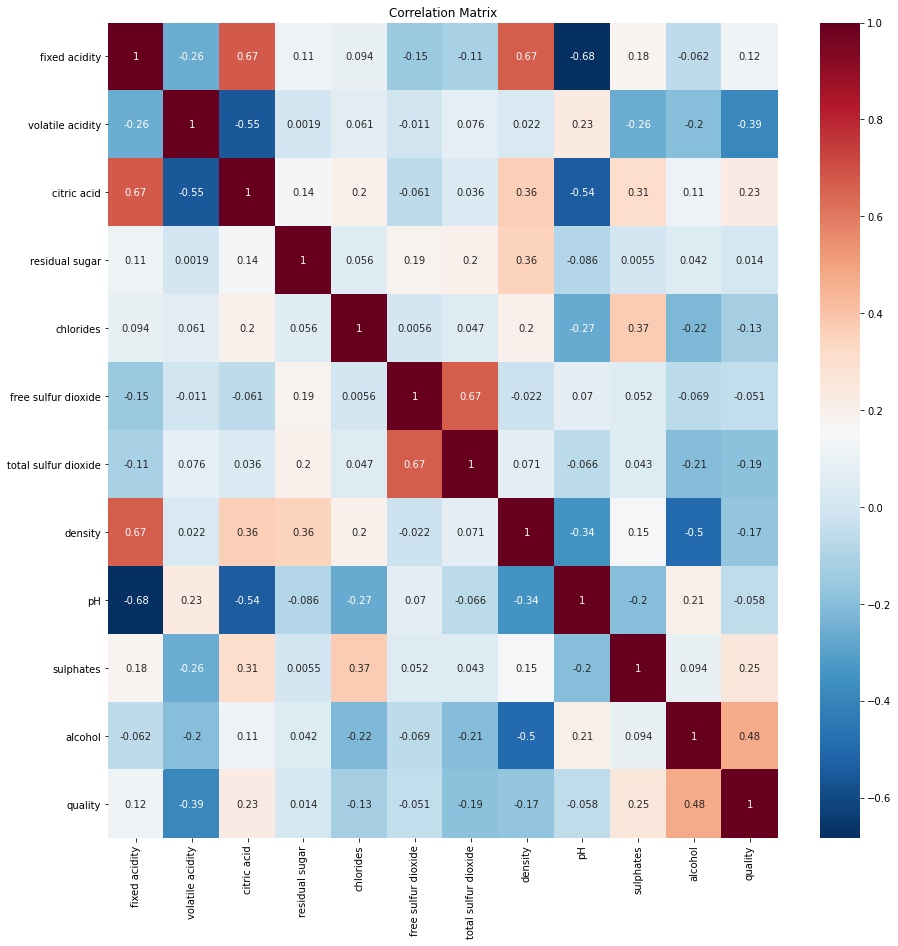

In [6]:
corr_matrix=wine_quality.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap='RdBu_r')
plt.title('Correlation Matrix')

## residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH

In [7]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

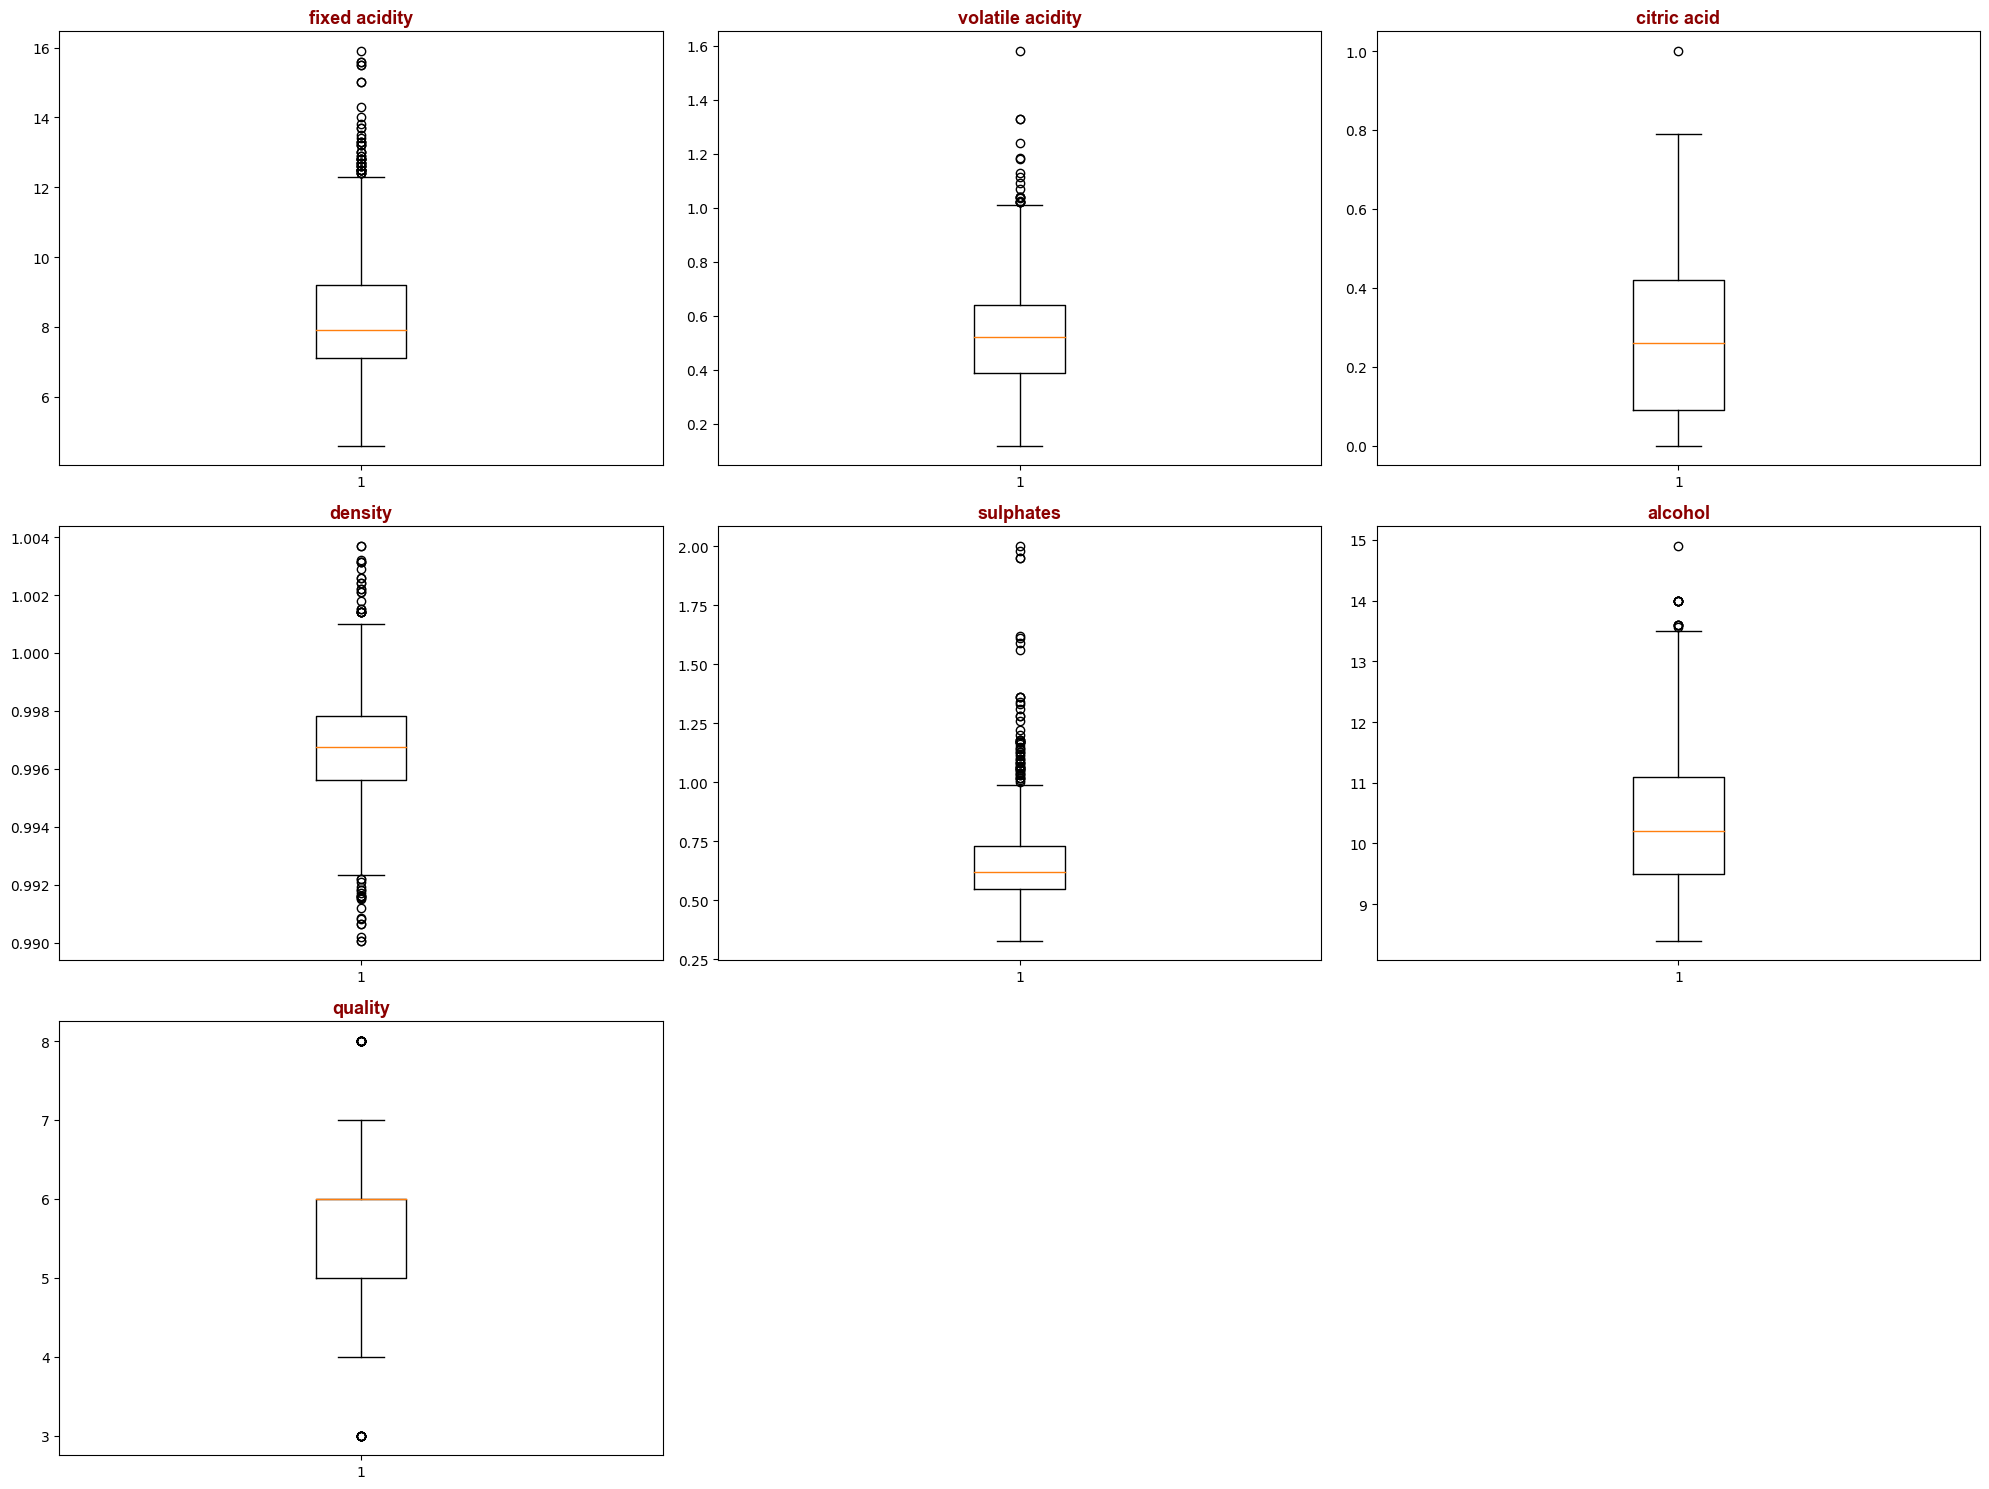

In [8]:
outliers_columns=['fixed acidity','volatile acidity','citric acid','density','sulphates','alcohol','quality']

plt.figure(figsize=(20,15))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    plt.boxplot(wine_quality[outliers_columns[i]])
    plt.title(outliers_columns[i], fontdict=title_font)
plt.tight_layout()
plt.show()

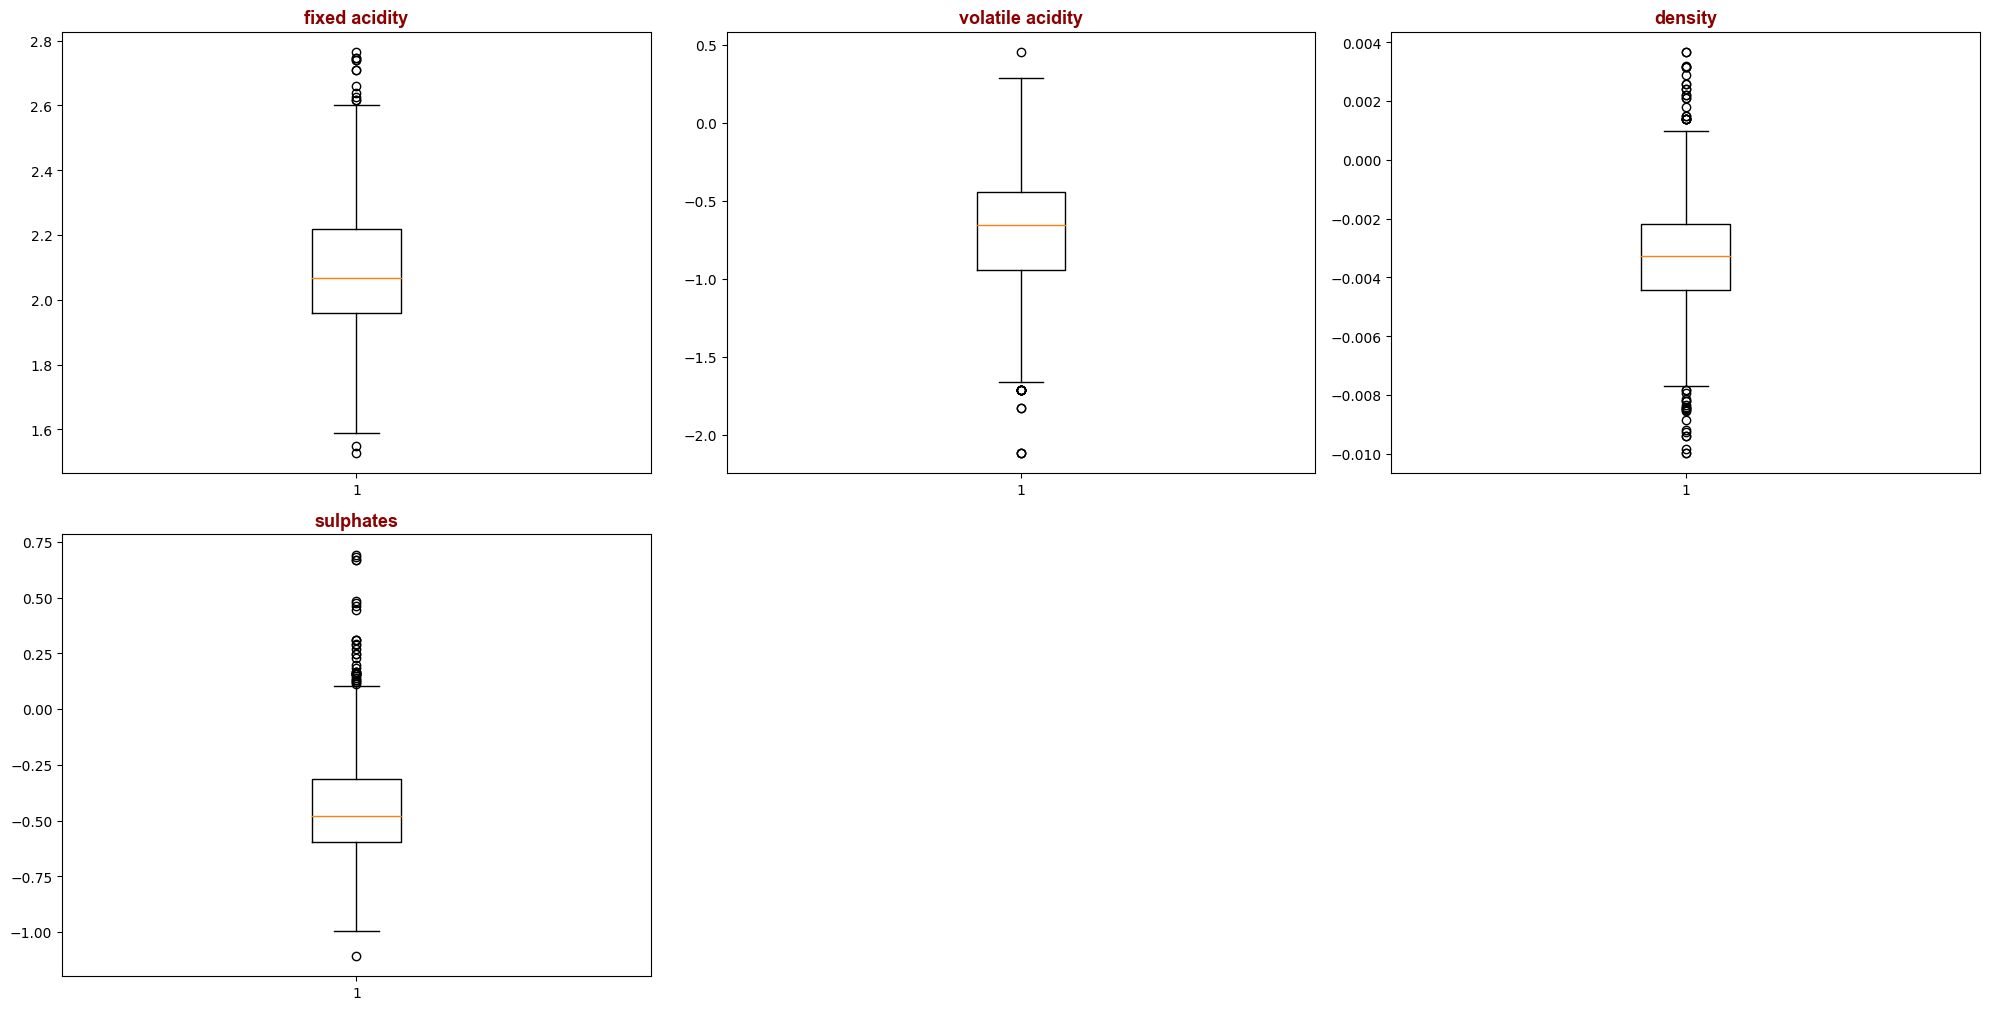

In [9]:
log_columns=['fixed acidity','volatile acidity','density','sulphates']

plt.figure(figsize=(20,15))
for i in range(0,4):
    plt.subplot(3,3,i+1)
    plt.boxplot(np.log(wine_quality[log_columns[i]]))
    plt.title(log_columns[i], fontdict=title_font)
plt.tight_layout()
plt.show()

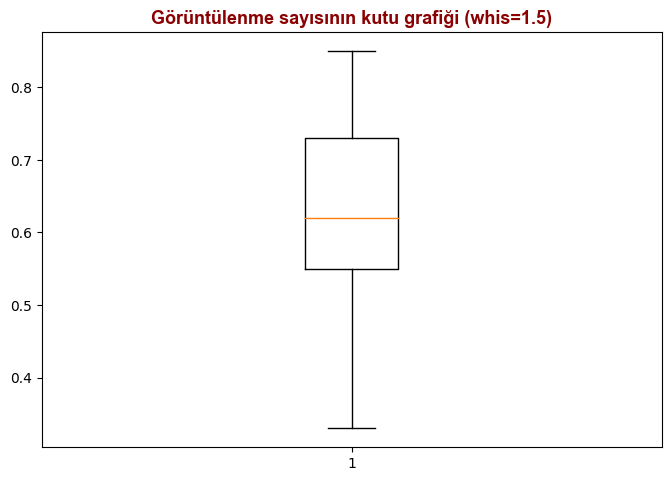

In [19]:
from scipy.stats.mstats import winsorize

winsorize_screening = winsorize(wine_quality["sulphates"], (0, 0.10))

plt.boxplot(winsorize_screening)
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=title_font)
plt.show()

In [ ]:
#wine_quality["sulphates"]=winsorize(wine_quality["sulphates"], (0, 0.10))